## Problem Statement:

-Create a predictive model which will help the bank to identify which customer will make transactions in future.

In [1]:
#Importing all basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Removing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the data
data=pd.read_csv('TRAIN.csv')
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


-The features given are numeric and anonymized.

-It shows predictions of (target column) as categorical data so it comes under classification...all other columns are i/p columns.

In [4]:
# ID_code is irrelevant column(bcoz it does not have any significance in model learning)
#so drop the column of ID_code

In [4]:
# drop the irrelevant column
data.drop('ID_code',axis=1,inplace=True)
data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


### Basic checks:


In [5]:
#checking number of rows & columns
data.shape

(200000, 201)

In [6]:
#column names
data.columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [7]:
#type of columns
data.dtypes

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

In [8]:
#1st 5 rows
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
#last 5 rows
data.tail()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,-0.4541,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [10]:
#entire info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [11]:
#statistical analysis of data
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [12]:
#check null values
data.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [14]:
#the target column is categorical/descret try to analyse the column


In [1]:
#Unique value of output (target)
data.target.unique()

NameError: name 'data' is not defined

In [16]:
#Records related to 0 & 1
data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

# EDA

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 30.,  0.,  0.],
        [ 0.,  0.,  0., ..., 19.,  0.,  0.]]),
 array([-90.2525 , -73.82404, -57.39558, -40.96712, -24.53866,  -8.1102 ,
          8.31826,  24.74672,  41.17518,  57.60364,  74.0321 ]),
 <a list of 201 BarContainer objects>)

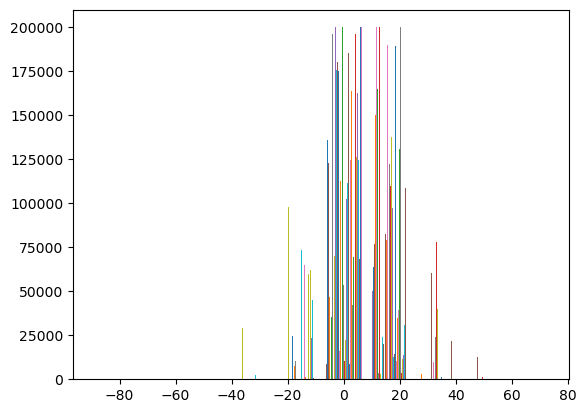

In [19]:
#Distribution of data
plt.hist(data)


<Axes: xlabel='target', ylabel='count'>

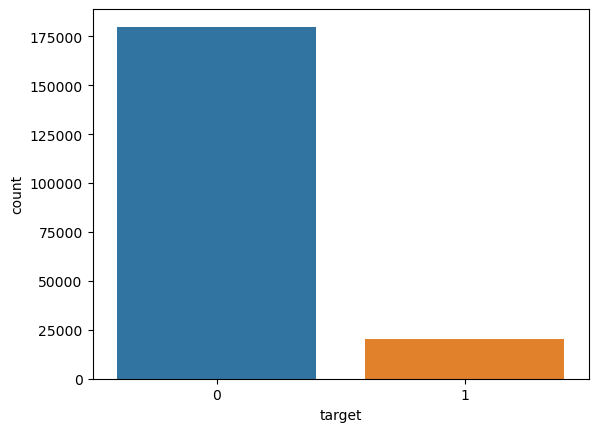

In [20]:
#Check for the data is balanced or not
sns.countplot(x=data.target)

Insight:
-The number of customers that will not make a transaction is much higher than those that will.
Therefore the data is not balanced.
-As the dataset is imbalanced, We have to handle it.



# Data Preprocessing

In [21]:
#check for missing values
data.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

-There are no missing values

In [22]:
#check for duplicates
data.duplicated().sum()

0

-There are no duplicates

<Axes: >

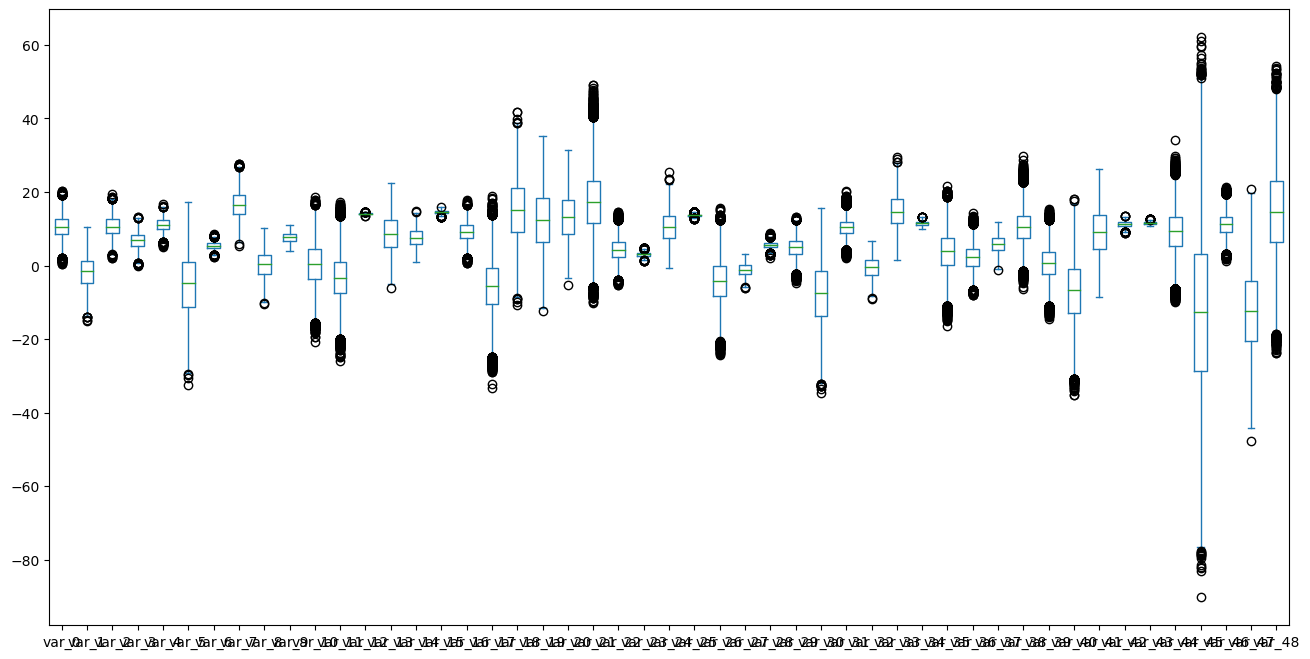

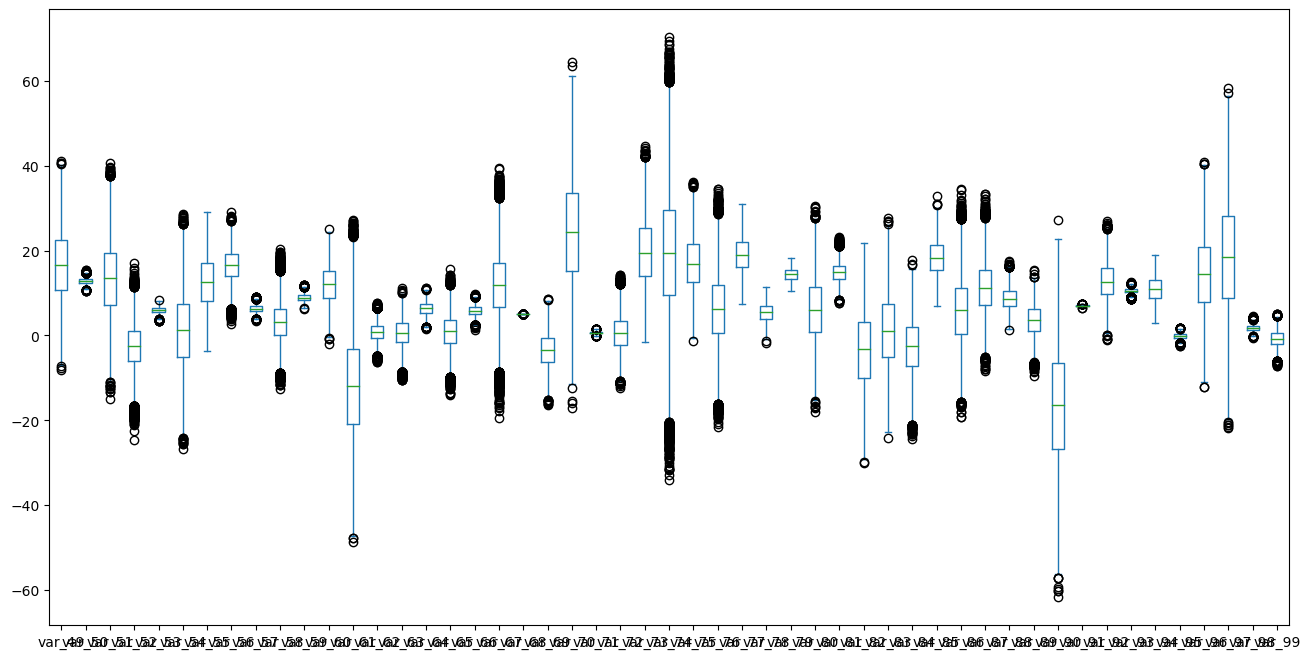

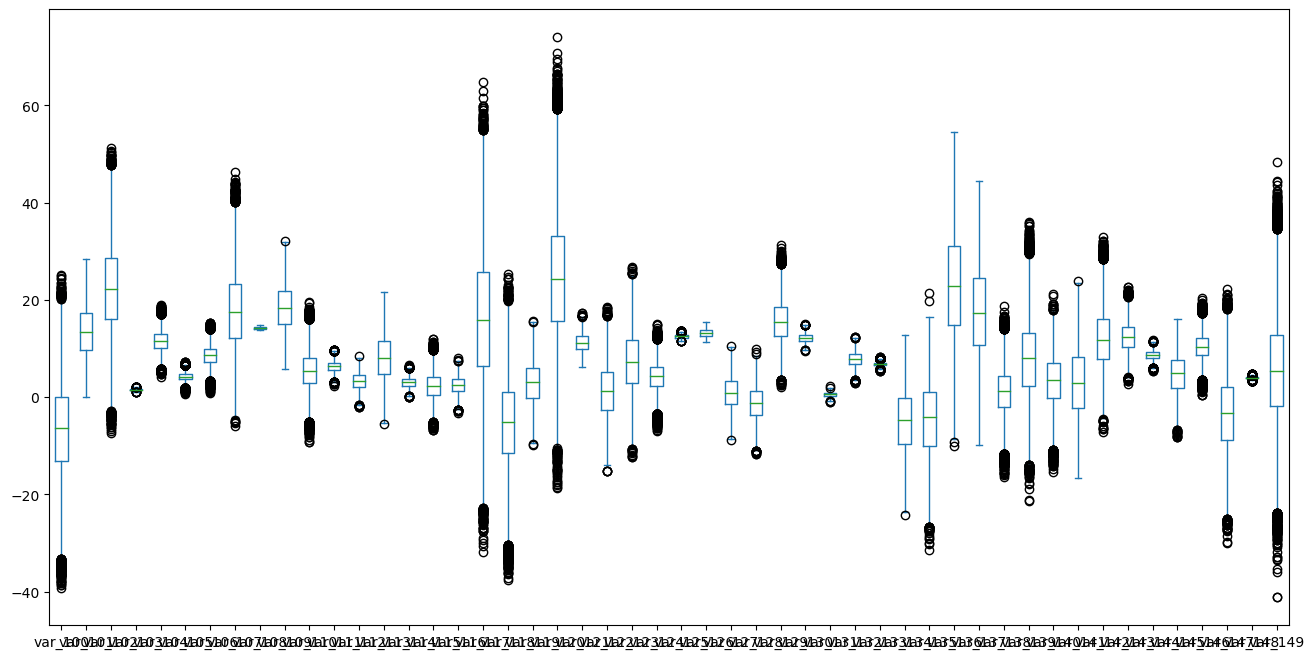

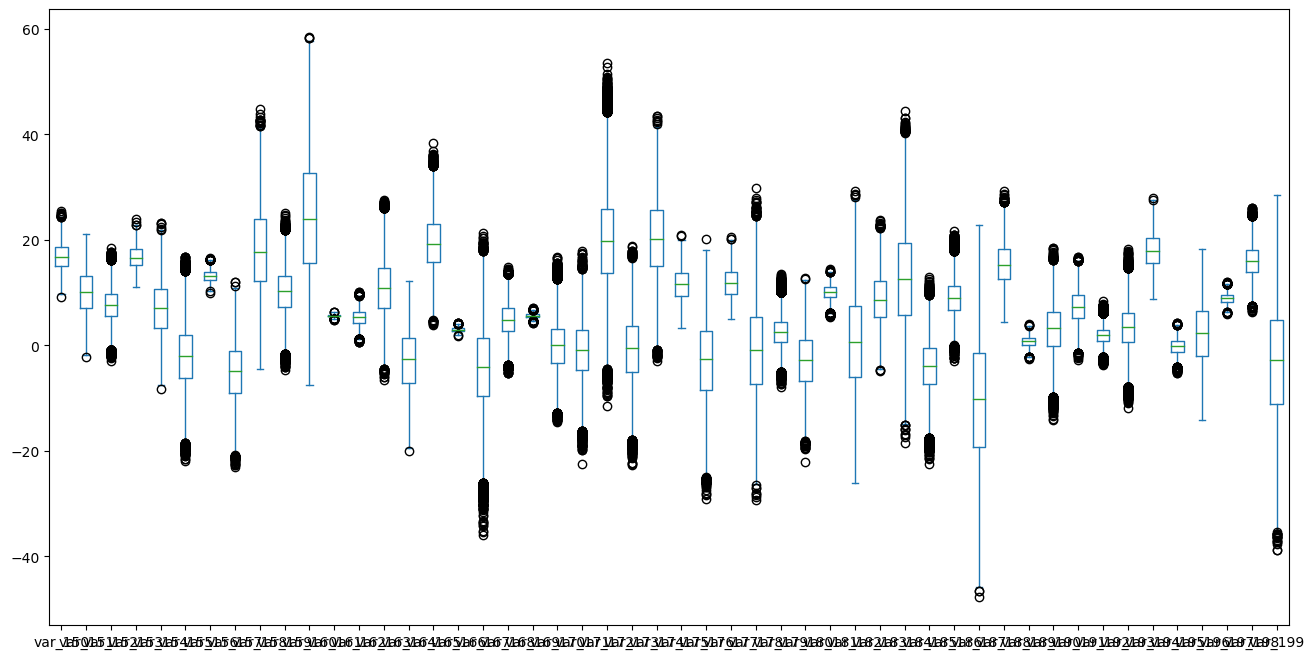

In [23]:
#Check for Outliers
data.iloc[:, 1:50].plot(kind='box', figsize=[16,8])
data.iloc[:, 50:101].plot(kind='box', figsize=[16,8])
data.iloc[:, 101:151].plot(kind='box', figsize=[16,8])
data.iloc[:, 151:].plot(kind='box', figsize=[16,8])

-Most of the data have outliers and range of the data variables is high.

In [24]:
#Creating X & Y
X=data.drop(labels=['target'],axis=1)
Y=data[['target']]

In [25]:
#Scaling:
#Scaling brings entire data into a particular scale

#We are using MinMax Scaler where it scales down all the values into the range of 0-1

from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
scaled_data=scaling.fit_transform(X)
scaled_data

array([[0.42785307, 0.32482435, 0.56805853, ..., 0.43095798, 0.32765751,
        0.56064496],
       [0.55721218, 0.42863943, 0.6812351 , ..., 0.4682771 , 0.6095461 ,
        0.60582746],
       [0.41196889, 0.48377668, 0.57806091, ..., 0.38194973, 0.42583343,
        0.58273586],
       ...,
       [0.5432771 , 0.39305749, 0.4870996 , ..., 0.45612437, 0.38087342,
        0.63919915],
       [0.46750324, 0.25309006, 0.66682332, ..., 0.67445942, 0.46661746,
        0.37047369],
       [0.5258457 , 0.36714503, 0.580254  , ..., 0.36840624, 0.29469964,
        0.57890533]])

-The o/p of scaling is array, but we cannot pass array as a data to train the model, we need to pass the scaled data (array) into a dataframe.

In [27]:
#convert it into dataframe
data1=pd.DataFrame(data=scaled_data,columns=X.columns)

In [28]:
#check scaled data
data1.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,0.247420,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,0.573056,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,0.276041,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,0.595326,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,0.516413,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041


<function matplotlib.pyplot.show(close=None, block=None)>

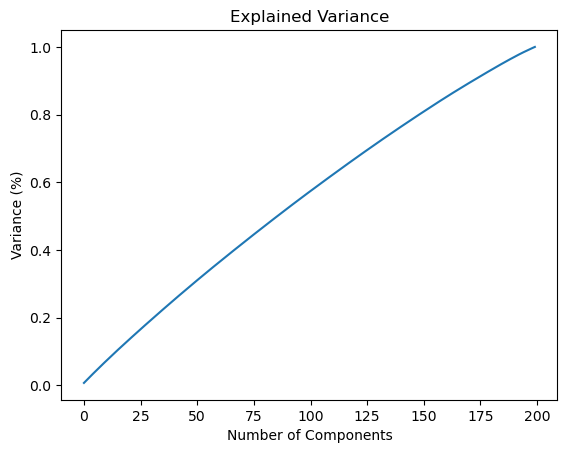

In [29]:
# Applying PCA for dimensionality reduction
from sklearn.decomposition import PCA

#initialize the PCA
pca=PCA()
principalComponents=pca.fit_transform(data1)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show

-From the diagram above, it can be seen that 125 components explain around 70% of the variance in data 

-Instead of giving all the columns as input, we will only feed 6 principal components of the data to the machine learning algorithm and will obtain a similar result (as PCA helps to reduce the dimensions of the features)

In [30]:
pca=PCA(n_components=6)
d1=pca.fit_transform(data1)

principal_comp=pd.DataFrame(data=d1,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [31]:
principal_comp.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.136980,0.116021,0.312220,-0.079765,0.090600,-0.060453
1,0.183650,0.276973,0.032620,0.054229,0.267133,0.119217
2,0.192468,0.011622,0.414593,-0.206706,-0.056980,-0.323945
3,-0.090310,-0.289420,-0.018784,0.364475,0.164907,0.086218
4,-0.115577,-0.060947,-0.126199,-0.306321,0.015380,0.135585


# Feature Selection

In [31]:
# In feature selection, we select the imp features by dropping the irrelevent column.
# Here, Irrelevent column is ID_code.......which we already dropped it.


<Axes: >

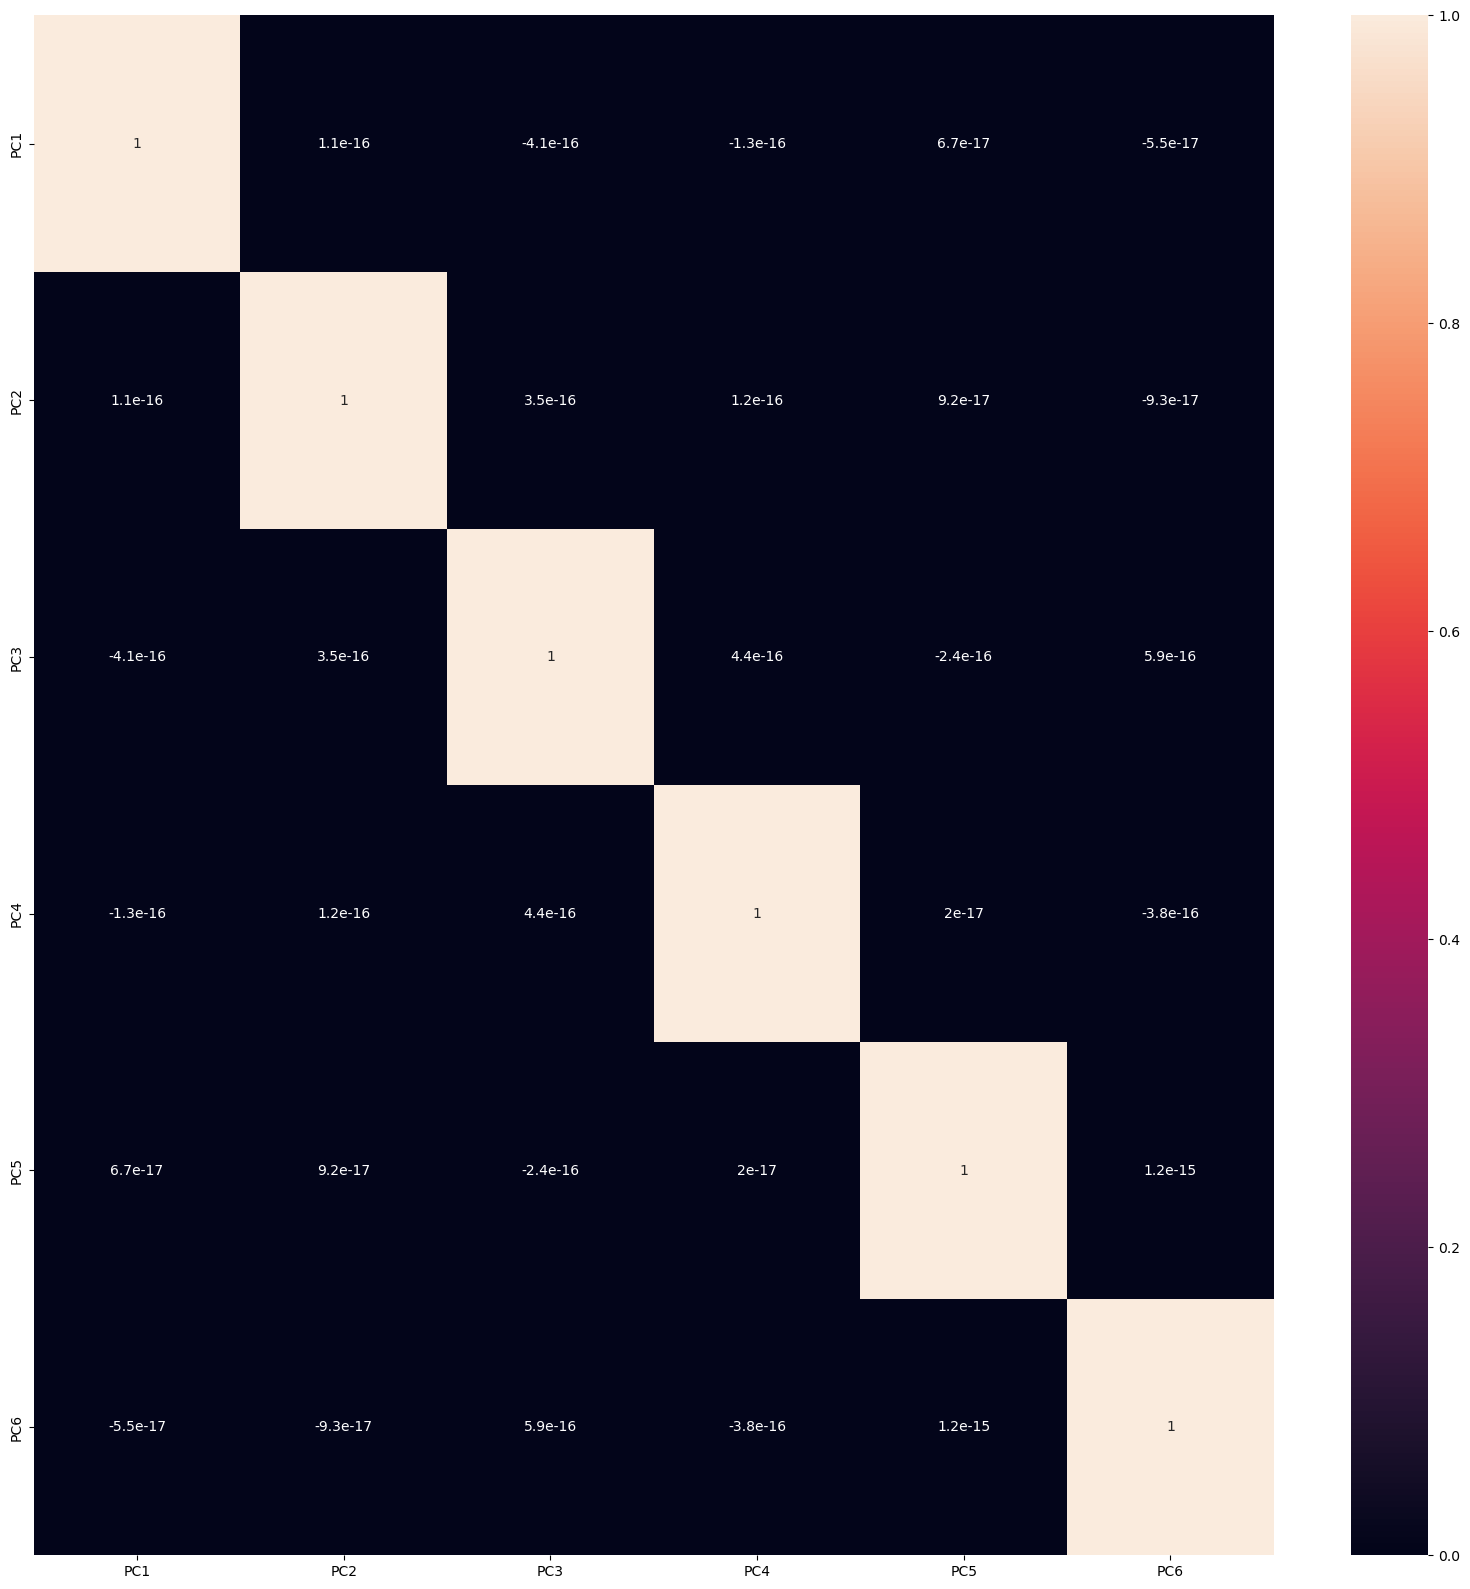

In [32]:
#Checking correlation
plt.figure(figsize=(20,20))
sns.heatmap(principal_comp.corr(),annot=True)

Heatmap: Since no column is giving us more than 80-85% correlation, we are selecting all the columns.

# Model Building

In [33]:
#split the data into i/p(x) & o/p(y)
x=principal_comp
x

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.136980,0.116021,0.312220,-0.079765,0.090600,-0.060453
1,0.183650,0.276973,0.032620,0.054229,0.267133,0.119217
2,0.192468,0.011622,0.414593,-0.206706,-0.056980,-0.323945
3,-0.090310,-0.289420,-0.018784,0.364475,0.164907,0.086218
4,-0.115577,-0.060947,-0.126199,-0.306321,0.015380,0.135585
...,...,...,...,...,...,...
199995,0.133791,0.234761,0.092333,0.202184,0.300595,0.068455
199996,-0.173291,0.187537,-0.048853,0.271538,-0.025354,0.065308
199997,-0.255009,0.233235,0.219619,-0.171826,0.018211,-0.106796
199998,0.147606,-0.525893,-0.193077,0.165327,-0.057471,-0.090806


In [34]:
y=data.target
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

In [36]:
#split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [37]:
#analyse the target class
data['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [38]:
#Balancing the data
#data is imbalanced, so we have to balanced the data=> using SMOTE


In [39]:
# Install imblearn package

!pip install imblearn


In [40]:
#Balancing the data
from imblearn.over_sampling import SMOTE
#Object creation
smote=SMOTE()     
#Importing counter to check count of each label
from collections import Counter
#Checking count for each class
print('Actual Classes',Counter(y_train))
#Applying sampling on target variable
x_smote, y_smote = smote.fit_resample(x_train,y_train)    
#Checking count after sampling for each class
print('Smote Classes',Counter(y_smote))

Actual Classes Counter({0: 126068, 1: 13932})
Smote Classes Counter({0: 126068, 1: 126068})


### Apply Algorithm

1) Logistic Regression
2) KNN
3) Decision Tree
4) SVM
5) Random Forest

# Evaluation of Model

In [41]:
#Importing evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

### Logistic Regression

In [42]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression
#initialise the model
model1=LogisticRegression()
#train the model
model1.fit(x_train,y_train)

LogisticRegression()

In [49]:
# Predict output for X_test
y_pred1=model1.predict(x_test)

In [50]:
confusion_matrix(y_test,y_pred1) #model 1

array([[53834,     0],
       [ 6166,     0]], dtype=int64)

In [51]:
#Accuracy
accuracy_score(y_test,y_pred1) #model 1

0.8972333333333333

In [52]:
#Precision
precision_score(y_test,y_pred1) #model 1

0.0

In [53]:
#Recall
recall_score(y_test,y_pred1) #model 1

0.0

In [54]:
#f1 score
f1_score(y_test,y_pred1) #model 1

0.0

In [55]:
classification_report1=print(classification_report(y_test,y_pred1)) #model 1

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53834
           1       0.00      0.00      0.00      6166

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



In [56]:
from sklearn.metrics import roc_curve,auc

In [57]:
False_positive_rate,True_positive_rate,Thresholds=roc_curve(y_test,y_pred1)

In [58]:
roc_auc_score=auc(False_positive_rate,True_positive_rate)
print(roc_auc_score)

0.5


### KNN

In [59]:
#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#initialise the model
model2=KNeighborsClassifier(n_neighbors=2)
#train the model
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [60]:
y_pred2=model2.predict(x_test)

In [61]:
confusion_matrix(y_test,y_pred2) #model 2

array([[53290,   544],
       [ 6076,    90]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred2) #model 2

0.8896666666666667

In [63]:
precision_score(y_test,y_pred2) #model 2

0.14195583596214512

In [64]:
recall_score(y_test,y_pred2) #model 2

0.014596172559195588

In [65]:
f1_score(y_test,y_pred2) #model 2

0.026470588235294114

In [66]:
classification_report2=print(classification_report(y_test,y_pred2)) #model 2

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     53834
           1       0.14      0.01      0.03      6166

    accuracy                           0.89     60000
   macro avg       0.52      0.50      0.48     60000
weighted avg       0.82      0.89      0.85     60000



### Decision Tree

In [67]:
#Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier
#initialise the model
model3=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=3,splitter='random')
#train the model
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [68]:
y_pred3=model3.predict(x_test) 

In [69]:
confusion_matrix(y_test,y_pred3) #model 3

array([[53783,    51],
       [ 6149,    17]], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred3) #model 3

0.8966666666666666

In [71]:
precision_score(y_test,y_pred3) #model 3

0.25

In [72]:
recall_score(y_test,y_pred3) #model 3

0.0027570548167369447

In [73]:
f1_score(y_test,y_pred3) #model 3

0.005453962143086301

In [74]:
classification_report3=print(classification_report(y_test,y_pred3)) #model 3

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53834
           1       0.25      0.00      0.01      6166

    accuracy                           0.90     60000
   macro avg       0.57      0.50      0.48     60000
weighted avg       0.83      0.90      0.85     60000



### SVM

In [ ]:
#Import SVC
from sklearn.svm import SVC
#initialise the model
model4=SVC()
#train the model
model4.fit(x_smote,y_smote)

In [ ]:
y_pred4=model4.predict(x_test) 

-SVM is work well with small datasets, it takes long time to execute

### Random Forest

In [75]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#initialise the model
model5=RandomForestClassifier(n_estimators=10)
#train the model
model5.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [76]:
y_pred5=model5.predict(x_test) 

In [77]:
confusion_matrix(y_test,y_pred3) #model 5

array([[53783,    51],
       [ 6149,    17]], dtype=int64)

In [78]:
accuracy_score(y_test,y_pred3) #model 5

0.8966666666666666

In [79]:
precision_score(y_test,y_pred3) #model 5

0.25

In [80]:
recall_score(y_test,y_pred3) #model 5

0.0027570548167369447

In [81]:
f1_score(y_test,y_pred3) #model 5

0.005453962143086301

In [82]:
classification_report3=print(classification_report(y_test,y_pred3)) #model 5

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53834
           1       0.25      0.00      0.01      6166

    accuracy                           0.90     60000
   macro avg       0.57      0.50      0.48     60000
weighted avg       0.83      0.90      0.85     60000



# Hyperparameter Tunning

In [ ]:
#Hyperparameter Tunning ( Random Forest )

In [83]:
#RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
n_estimators=[10]
max_features=[5]
max_depth=[10]
min_samples_split=[2]
min_samples_leaf=[1]


#Dictionary for hyperparameters
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

rf_clas=RandomForestClassifier(random_state=4)
rf_cv=RandomizedSearchCV(estimator=rf_clas,scoring='f1',param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=4,n_jobs=-1)


#training data on Randomizedsearch cv
rf_cv.fit(x_train,y_train)
#best parameters
rf_best_params=rf_cv.best_params_
print(f'Best Parameters:{rf_best_params}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters:{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10}


In [85]:
#Passing best parameters to Randomforest
rf_clas2=RandomForestClassifier(n_estimators=10,min_samples_split=2,min_samples_leaf=1,max_features=5,max_depth=10)

rf_clas2.fit(x_train,y_train)
y_predict=rf_clas2.predict(x_test)



In [86]:
f1_score(y_test,y_predict)

0.0032284100080710253

In [87]:
accuracy_score(y_test,y_predict) 

0.8970833333333333

In [88]:
y_pred=rf_clas2.predict(x_train)


In [89]:
f1_score(y_train,y_pred)

0.029274501484938483

In [90]:
accuracy_score(y_train,y_pred) 

0.9019428571428572

## Conclusion:

-As we tried model with Logistic Regression, KNN ,Decision Tree, SVM, Random Forest, But Random Forest model is performing well compared to other models. (SVM takes too much time for execution)
-Random Forest (Hyperparameters) maintains accuracy and avoids overfitting.